## **CHAPTER 02. 클린 아키텍처**

클린 아키텍처(clean architecture)는 <<클린 코드>>의 저자 마틴이 제안한 아키텍처다.
클린 아키텍처는 새로운 개념이 아니다.
이미 클린 아키텍처를 잘 알고 있거나 활용하고 있다면 이 장을 건너뛰어도 좋다.
하지만 우리가 배워야 할 큰 주제가 FastAPI 프레임워크를 활용해 클린 아키텍처를 적용한 애플리케이션을 구현하는 것이므로, 꼭 읽어볼 것을 권한다.

### **2.1. 아키텍처가 필요한 이유**
---

소프트웨어 업계에는 건축 분야에서 차용한 언어가 많다.
예컨대 다음과 같은 것들이 있다.

* 아키텍처(architecture): 시스템의 전체적인 구조 및 구성.
* 프레임워크(framework): 재사용 가능한 구조나 코드 기반을 제공해 애플리케이션 구축에 도움을 주는 도구나 환경.
* 모듈(module): 소프트웨어에서 특정 기능 또는 구성 요소.
* 프로토콜(protocol): 소프트웨어 통신에서 데이터 교환을 규제하는 규칙 집합.
* 레이어(layer): 소프트웨어 시스템에서 서로 연관된 기능 또는 구성 요소의 그룹.
* 프로토타입(prototype): 초기 버전 또는 모델.
* 플랫폼(platform): 특정 환경에서 소프트웨어를 실행하고 개발할 수 있는 기반 시스템.
* 설계(design): 소프트웨어 설계는 소프트웨어 시스템, 애플리케이션 또는 모듈의 구조, 동작 및 구현 계획을 수립하는 프로세스 및 그 행위를 의미함. 이 단계에서는 소프트웨어의 아키텍쳐, 모듈 및 클래스의 관계, 데이터 구조, 사용자 인터페이스 디자인, 알고리즘 및 세부 구현 사항을 정의함.
* 구조(structor): 소프트웨어 시스템 또는 애플리케이션의 내부 구조 및 구성. 

소프트웨어 시스템에서의 아키텍쳐는 신중하게 검토해서 적용해야 한다.
그만큼 중요하다는 의미이다.
왜냐하면 아키텍처가 다음과 같은 역할을 하기 때문이다.

* 확장성(scalability): 좋은 아키텍처가 적용된 시스템은 요구 사항이 늘어날 때 새로운 기능을 쉽게 추가하고 리소스를 효율적으로 확장할 수 있다.
* 유지보수성(maintainability): 잘 설계된 아키텍처는 코드의 유지보수와 개선을 편하게 한다.
* 재사용성(reusability): 아키텍처는 모듈화 및 추상화를 통해 코드의 재사용성을 높인다.
* 보안(security): 보안 요구 사항을 고려한 설계는 시스템을 보호하고, 공격으로부터 안전하게 유지하는 데 도움이 된다.
* 성능(performance): 좋은 아키텍처는 데이터 흐름 및 리소스 사용을 효과적으로 관리해 응답 시간을 최소화하고 확장성을 확보한다.
* 의사소통(communication): 아키텍처는 개발팀과 이해 관계자 간의 의사소통을 간소화한다. 
* 비용 효율성(cost-effectiveness): 올바른 아키텍처 설계는 프로젝트 비용을 최적화하고 예산을 효율적으로 활용할 수 있도록 도와준다.
* 기업 목표 달성(buisness goal): 시스템이 비즈니스 요구 사항을 지원하고 확장과 유지가 쉽도록 구축하면 기업의 성과 향상에 기여할 수 있다.
* 품질 보증(quality assurance): 소프트웨어 제품의 품질을 보증하고 높은 품질 표준을 유지할 수 있도록 도와준다.
* 복잡성 관리(complexity management): 복잡한 소프트웨어 시스템을 관리하고 이해하는 데 도움을 준다. 모듈화 및 추상화를 통해 복잡성을 관리하고 줄일 수 있다.

클린 아키텍처의 역할도 위에서 설명한 바와 다르지 않다.
다만 여러 아키텍처와 비교해 다음과 같은 특징을 더 강조하고 있다.

* 관심사 분리와 계층형 아키텍처: 소프트웨어의 구성 요소들은 관심사에 따라 분리한다. 이는 네 개의 계층으로 나뉘어져 있다.
* 인터페이스 우선: 구성 요소들의 인터페이스를 먼저 정의해 사용한다. 세부 구현은 필요 시점에 한다.
* 의존성 규칙(dependency rule): 클린 아키텍처의 핵심 원리이다. 소스 코드 의존성은 항상 외부에서 내부로 향해야 하며, 가장 중요한 코드(비즈니스 규칙)는 시스템의 중심에 있어야 한다.

아키텍처가 없는 시스템은 없다.

### **2.2. 분할 정복**
---

분할 정복(divide and conquer)이라는 용어는 같은 이름의 알고리즘을 먼저 떠올릴 수도 있을 것이다.
분할 정복 알고리즘의 아이디어는 큰 문제를 해결할 수 있는 작은 하위 문제로 나눈 다음 각 하위 문제를 독립적으로 해결하고, 마지막으로 이들 해결책을 통합해 큰 문제를 해결하는 방식을 말한다.
이 패러다임은 복잡한 문제를 간단한 부분 문제로 분해하고, 이러한 부분 문제를 해결함으로써 전체 문제를 효율적으로 해결할 수 있도록 도와준다.

분할 정복의 주요 단계는 다음과 같다.

1. 분할(divide): 큰 문제를 더 작은 하위 문제로 나눈다. 이 단께에서 문제를 독립적으로 해결하기 쉬운 하위 문제로 분해한다.
2. 정복(conquer): 각 하위 문제를 독립적으로 해결한다. 이것은 일반적으로 재귀적으로 수행된다.
3. 통합(combine): 각 하위 문제의 해결책을 통합해 원래 문제의 해결책을 얻는다.

분할 정복은 다양한 알고리즘과 문제 해결 방법에서 사용된다.
예컨대 병합 정렬(merge sort)이나 퀵 정렬(quick sort)과 같은 정렬 알고리즘이 있다.
이러한 알고리즘들은 데이터를 분할하고 정복하는 방식을 사용해 정렬 문제를 효율적으로 해결한다.
또한 이 방법은 그래프 알고리즘, 최적화 문제, 검색 알고리즘 등 다양한 분야에서 활용된다.

분할 정복 기법을 이용하면 큰 일을 테스크 단위의 간단한 일로 쪼개어 수행한다.
따라서 작업의 복잡도가 낮아지고, 문제를 이해하기 쉬워져 달성해야 할 과업의 난이도를 낮출 수 있다.
여기서 다룰 웹 프로그래밍에 분할 정복을 대입해보자.
어떤 요청이 전달돼 내부 서비스 로직을 수행한 다음 외부로 응답을 내보내기까지의 단계를 여러 개로 분할할 수 있다.

아키텍처의 관점에서 바라보면 이러한 작업은 단순히 모듈을 구조화하는 것에 그치지 않는다.
비슷한 종류의 모듈을 한데 모아 계층으로 구성하고, 기능을 확장할 때 각 계층에서 처리하는 유사한 일들을 쪼개어 수행한다.
즉, 나누어진 계층의 일을 처리할 때는 다른 계층에서 맡은 일은 고려하지 않고 현재 계층이 담당하는 구현에 집중한다.

뒤에서 곧 보겠지만 클린 아키텍처는 네 개의 계층을 가진다.
그리고 각 계층은 자신만의 문제를 해결한다.
같은 계층에 존재하는 여러 모듈은 같은 목적을 지니고 있고 유사한 패턴을 가진다.
예컨대 인터페이스 계층에 있는 모듈은 내부로 들어오는 요청이 제대로 되어 있는지 검사하고 외부로 나가는 응답을 제대로 구성하는 등 외부와 내부 사이의 인터페이스를 처리하는 기능을 한다.

여기에 익숙해지면 새로운 API를 구현할 때 각 계층이 맡은 역할에 집중하며 계층을 하나씩 만들 수 있다.
역할이 나누어져 있으므로 작성해야 하는 전체 코드의 양은 많아질 수도 있지만, 한 계층 안에서의 코드 양은 줄어들기 때문에 더 이해가 빠르고 간결한 코드를 작성하게 된다.

### **클린 아키텍처의 주요 4 계층**
---

클린 아키텍처는 전혀 새로운 아키텍처가 아니다.
육각형 아키텍처(Hexagonal architecture), 양파 아키텍쳐(Onion architecture)라고 불리던 아키텍처에서 발전한 것이다.
소프트웨어를 여러 개의 계층으로 나누고 각 계층에 있는 구성 요소는 안쪽 원에 있는 구성 요소에만 의존성을 가지도록 한다.
따라서 안쪽 원에 존재하는 구성 요소는 바깥쪽에 독립적이다.

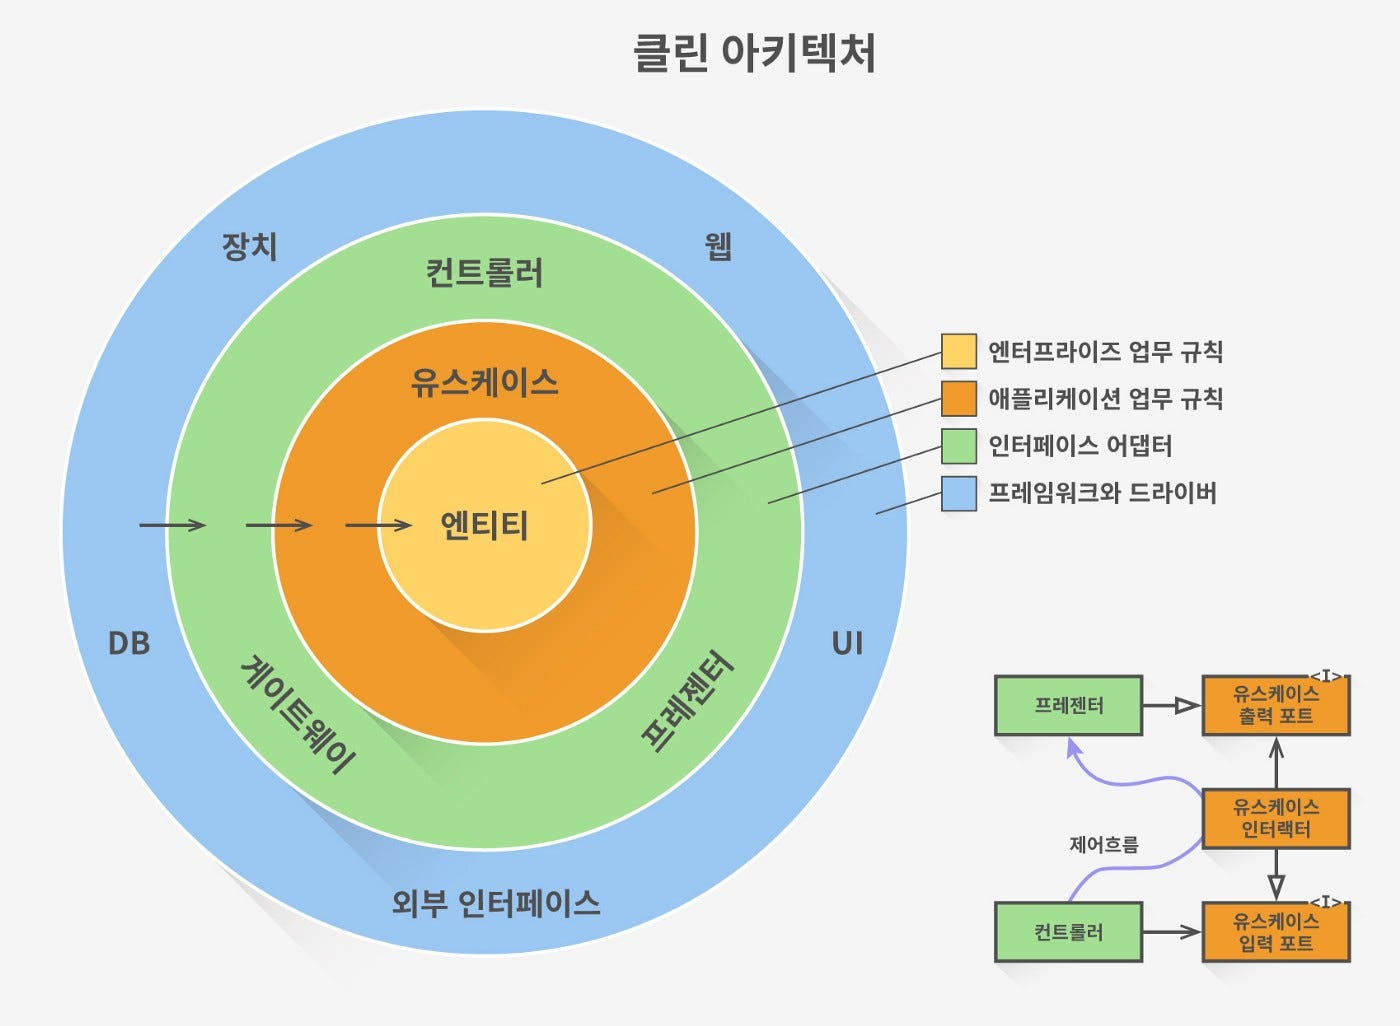

클린 아키텍처의 개념을 정립한 마틴은 원문에서 각 계층의 이름을 안쪽 계층부터 각각 '엔티티', '유스 케이스', '인터페이스 어댑터', '프레임워크 및 드라이버'라고 했다.
위 그림에서 원 내부에 있는 용어와 우상단에 있는 용어를 섞어서 쓰고 있다.
또한 '인터페이스 어댑터', '프레임워크 및 드라이버'와 같은 계층은 이름이 너무 길어 커뮤니케이션하기 힘든 면이 있다.
코드로 구현할 때 각 계층을 디렉터리로 분리해야 하는데 경로도 길어진다.
따라서 각 계층의 이름을 다음과 같이 변경해서 사용하기로 한다.

* 엔티티 -> 도메인
* 유스 케이스 -> 애플리케이션
* 인터페이스 어댑터 -> 인터페이스
* 프레임워크 및 드라이버 -> 인프라스트럭처(인프라)

안으로 갈수록 고수준의 구성 요소가 된다.
여기서 고수준이란 더욱 추상화된 관점에서 문제를 해결하거나, 더 추상적이며 개념적인 관점을 의미한다.
고수준의 코드나 개념은 일반적으로 더 큰 개념이나 추상화된 표현을 사용하고 세부 사항에 대한 구체적인 처리 방법은 명시하지 않는다.
이에 비해 저수준은 더 구체적이거나 세부적인 관점을 나타낸다.
코드 또는 개념이 구체적이며 세부 사항에 집중한다.
저수준의 코드는 일반적으로 하드웨어에 가깝거나 구현 세부 사항을 다루는 데 사용되며, 더 구체적인 작업이나 데이터 처리 방법을 다룬다.